In [1]:
pip install split-folders tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import splitfolders
import os

Input Folder untuk dibagi menjadi train dan val

In [3]:
base_dir = '/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto'

# Preprocessing

In [4]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 1399 files [02:09, 10.82 files/s]


Menambahkan masing masing folder untuk train dan validation

In [5]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(test_dir)

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
#def to_grayscale_then_rgb(image):
    #original = tf.constant([[[32, 150, 3.0]]])
    #image = tf.image.rgb_to_grayscale(image)
    #return image 

In [13]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # memutar gambar
                    brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    shear_range=0.2, # untuk mengatur skala image
                    zoom_range=(0.8,1.0), # value < 1 akan zoom in
                    fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    #preprocessing_function=to_grayscale_then_rgb,
                    horizontal_flip=True,
                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical',
    color_mode = 'grayscale'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    color_mode = 'grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    color_mode = 'grayscale'
)

Found 977 images belonging to 7 classes.
Found 138 images belonging to 7 classes.
Found 284 images belonging to 7 classes.


# Visualisasi

In [15]:
class_name = ['A','B','C','D','E','F','G']

In [16]:
image, label = train_generator.next()

In [17]:
len(image)

32

In [18]:
label

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
 

In [21]:
print(image.shape)

(32, 150, 150, 1)


In [19]:
gambar = tf.reshape(image[3],(150,150))

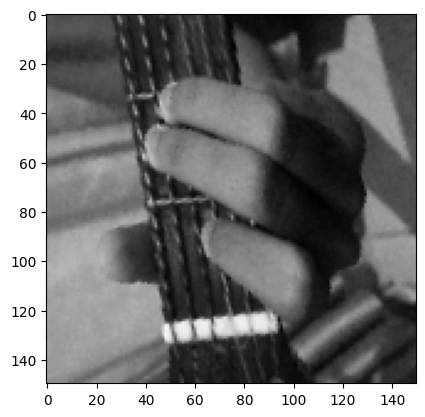

In [20]:
plt.imshow(gambar,cmap = 'gray')

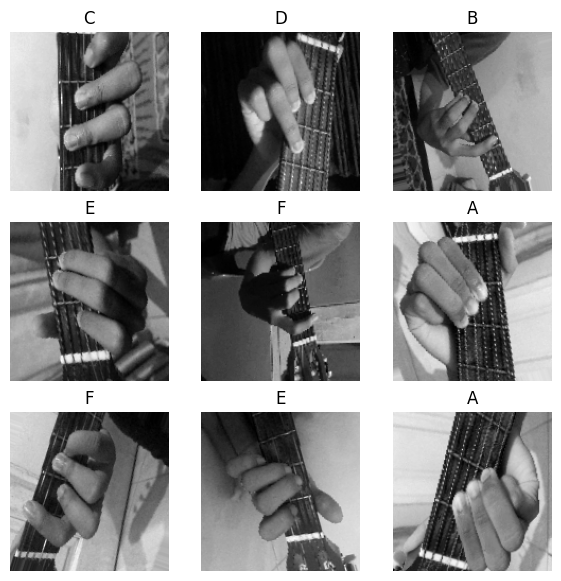

In [21]:
## GRAYSCALE
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i],cmap = 'gray')
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")


(32, 150, 150, 1)


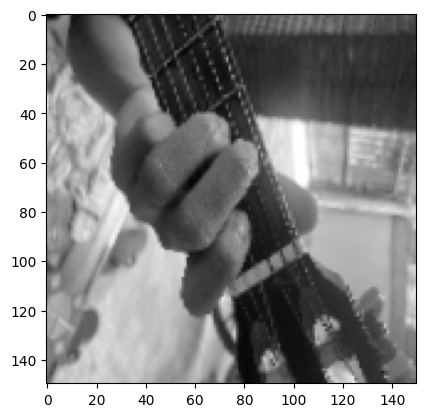

(32, 150, 150, 1)


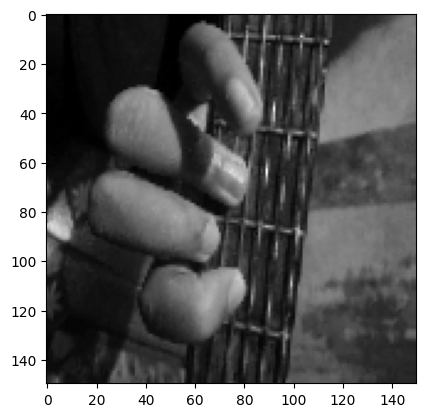

(32, 150, 150, 1)


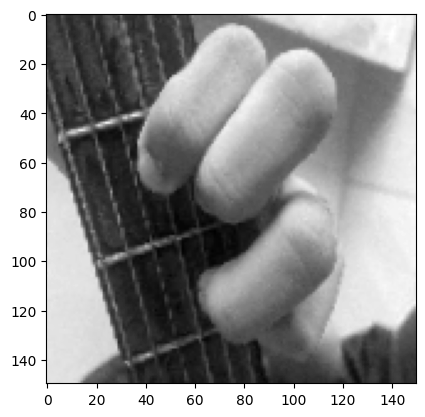

(32, 150, 150, 1)


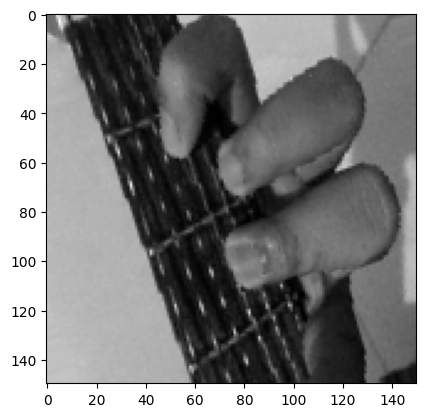

(32, 150, 150, 1)


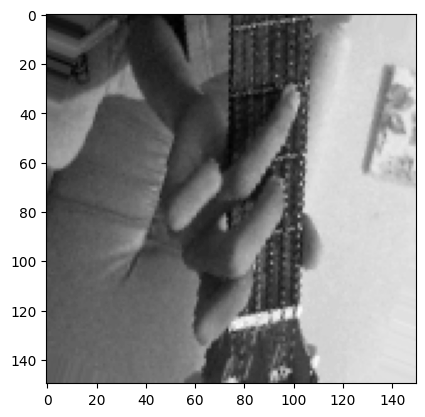

(32, 150, 150, 1)


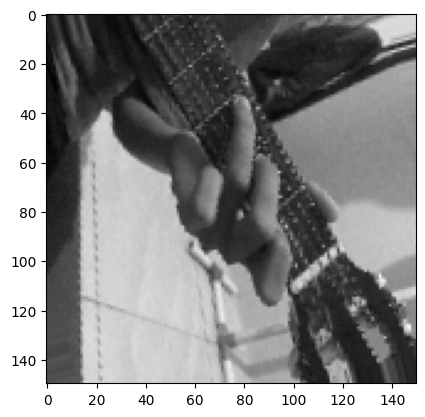

(32, 150, 150, 1)


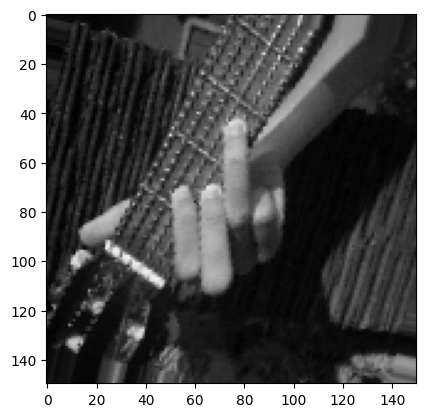

In [22]:
for _ in range(7):
  img, label = train_generator.next()
  print(img.shape)   #  (1,256,256,3)
  plt.imshow(img[0], cmap = 'gray')
  plt.show()

# Modeling

In [33]:
from tensorflow import keras

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)), #input layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax') # output Layer
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [38]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator, # untuk akurasi pengujian data
)

Epoch 1/25
31/31 [==============================] - 110s 4s/step - loss: 1.9494 - accuracy: 0.1177 - val_loss: 1.9458 - val_accuracy: 0.1522
Epoch 2/25
31/31 [==============================] - 102s 3s/step - loss: 1.9438 - accuracy: 0.1505 - val_loss: 1.9181 - val_accuracy: 0.1884
Epoch 3/25
31/31 [==============================] - 102s 3s/step - loss: 1.8960 - accuracy: 0.2088 - val_loss: 1.9109 - val_accuracy: 0.2174
Epoch 4/25
31/31 [==============================] - 102s 3s/step - loss: 1.8461 - accuracy: 0.2702 - val_loss: 1.8980 - val_accuracy: 0.2101
Epoch 5/25
31/31 [==============================] - 102s 3s/step - loss: 1.7505 - accuracy: 0.2825 - val_loss: 1.8024 - val_accuracy: 0.3116
Epoch 6/25
31/31 [==============================] - 102s 3s/step - loss: 1.6689 - accuracy: 0.3224 - val_loss: 1.7088 - val_accuracy: 0.2899
Epoch 7/25
31/31 [==============================] - 102s 3s/step - loss: 1.5751 - accuracy: 0.3889 - val_loss: 1.4391 - val_accuracy: 0.4638
Epoch 8/25
31

In [39]:
model.save('/Users/SHaneEZolDyC/PA_KB/Hasil Model Kunci Gitar') 
model.save('/Users/SHaneEZolDyC/PA_KB/Hasil Model Kunci Gitar.h5')

INFO:tensorflow:Assets written to: /Users/SHaneEZolDyC/PA_KB/Hasil Model Kunci Gitar\assets


INFO:tensorflow:Assets written to: /Users/SHaneEZolDyC/PA_KB/Hasil Model Kunci Gitar\assets


# Evaluate

In [40]:
test_evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.6014465093612671
Test accuracy : 0.77


# Preview Hasil Prediksi Kunci Gitar

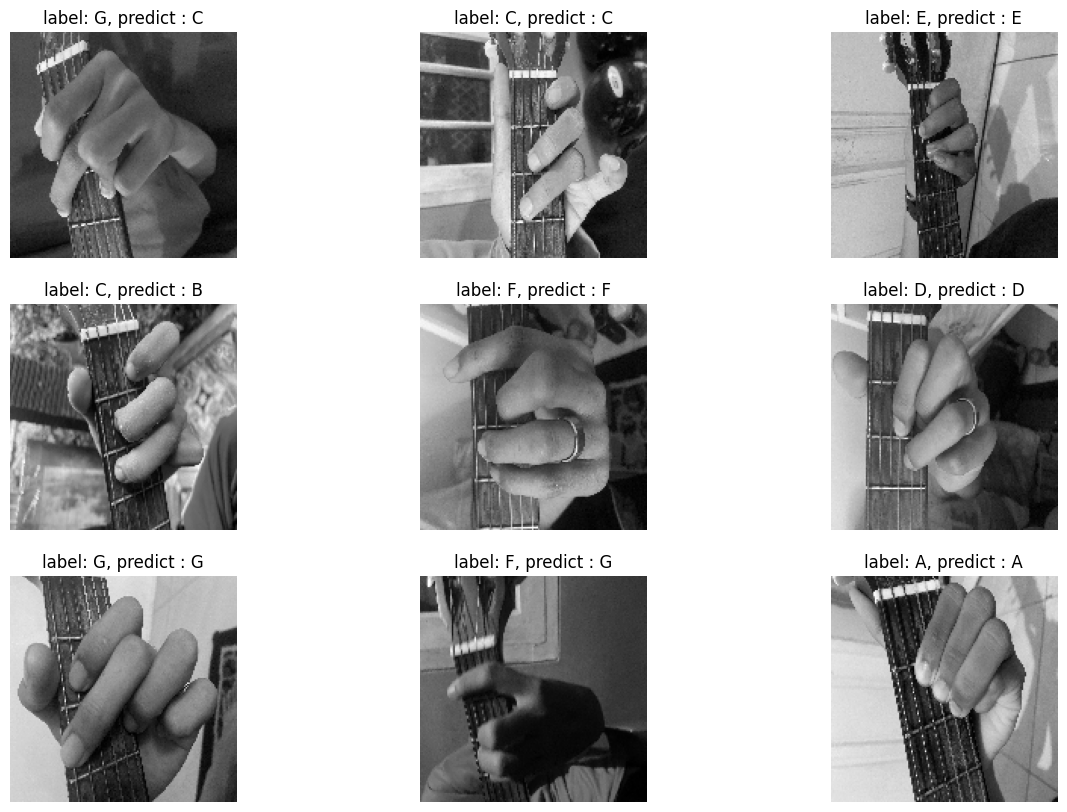

In [48]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]),cmap='gray')
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

In [43]:
from sklearn.metrics import classification_report

In [44]:
y_pred = model.predict(test_generator)

9/9 [==============================] - 25s 3s/step


In [45]:
y_pred

array([[8.46128538e-03, 1.39114112e-01, 5.08078896e-02, ...,
        7.31018841e-01, 1.65052935e-02, 5.40064164e-02],
       [4.61560348e-03, 1.33572206e-01, 1.09920010e-01, ...,
        6.81050301e-01, 4.26386297e-02, 2.79523004e-02],
       [2.55937409e-02, 1.37969423e-02, 1.03701666e-01, ...,
        1.22237466e-01, 6.59055659e-04, 4.16543573e-01],
       ...,
       [7.26471171e-06, 4.24373336e-03, 4.75647449e-02, ...,
        2.31911312e-04, 9.36716139e-01, 9.16745700e-03],
       [3.21832704e-06, 5.47631048e-02, 9.32250991e-02, ...,
        2.25942349e-03, 8.47096443e-01, 1.11382490e-03],
       [1.38111159e-06, 3.33399908e-03, 5.61128883e-03, ...,
        9.08431768e-01, 3.38545963e-02, 4.87565249e-02]], dtype=float32)

In [46]:
y_predict = np.argmax(y_pred, axis=1).tolist()

In [47]:
print(classification_report(test_generator.labels, y_predict, target_names = class_name))

              precision    recall  f1-score   support

           A       0.15      0.15      0.15        40
           B       0.04      0.05      0.04        40
           C       0.03      0.03      0.03        40
           D       0.09      0.10      0.09        42
           E       0.19      0.20      0.19        41
           F       0.03      0.02      0.03        42
           G       0.12      0.10      0.11        39

    accuracy                           0.09       284
   macro avg       0.09      0.09      0.09       284
weighted avg       0.09      0.09      0.09       284



# Mencoba Program dengan upload data gambar untuk di cek hasilnya

In [75]:
# from google.colab import files
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tensorflow.keras.utils import load_img
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [ ]:
#  upload = files.upload() buat pas make google colab

1/1 [==============================] - 0s 33ms/step
E:/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto/A/IMG_0336.jpeg
A


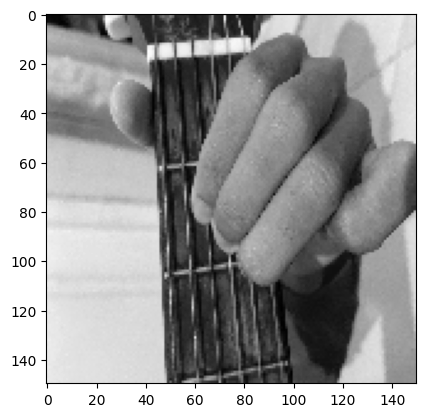

In [80]:
filename = askopenfilename()
img = keras.utils.load_img(filename, color_mode = 'grayscale', target_size=(150, 150))
imgplot = plt.imshow(img, cmap = 'gray')
x = img_to_array(img)
x = np.expand_dims(x, axis=0)


image = np.vstack([x])
classes = model.predict(image, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('A')
elif classes[0][1] == 1:
  print('B')
elif classes[0][2] == 1:
  print('C')
elif classes[0][3] == 1:
  print('D')
elif classes[0][4] == 1:
  print('E')
elif classes[0][5] == 1:
  print('F')
else:
  print('G')